In [391]:
#CHECKBOOK EXPLORER data : https://data.boston.gov/dataset/checkbook-explorer
#REVENUE data : https://data.boston.gov/dataset/revenue-budget

In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [393]:
df_16 = pd.read_csv('checkbook-explorerfy16.csv',encoding = "cp1252",low_memory=False)
df_17 = pd.read_csv('checkbook-explorerfy17.csv',encoding = "cp1252",low_memory=False)
df_18 = pd.read_csv('checkbook-explorerfy18.csv',encoding = "cp1252",low_memory=False,dtype = {'Monetary Amount': str})
df_19 = pd.read_csv('checkbook-explorerfy19.csv',encoding = "cp1252",low_memory=False,dtype = {'Monetary Amount': str})
df_20 = pd.read_csv('checkbook-explorerfy20.csv',encoding = "cp1252",low_memory=False,names = list(df_16.columns),header = 0,dtype = {'Monetary Amount': str})
df = pd.concat([df_16, df_17, df_18, df_19, df_20], ignore_index=True)

In [394]:
df.head()

,Voucher,Voucher Line,Distribution Line,Entered,Month (Number),Fiscal Month,Month,Fiscal Year,Year,Vendor Name,Account,Account Descr,Dept,Department Name,Program,Monetary Amount
0,L0004356,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Higginbottom Sahwniece N,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,"$5,790.00"
1,L0004346,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Paul Jean Geralde,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,"$3,835.00"
2,L0004347,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Alvarado Kristine,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,"$5,000.00"
3,L0004348,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Denizard Laurence K,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,"$7,140.00"
4,L0004349,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Ramos Juan,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,"$2,695.00"


In [395]:
df.tail()

,Voucher,Voucher Line,Distribution Line,Entered,Month (Number),Fiscal Month,Month,Fiscal Year,Year,Vendor Name,Account,Account Descr,Dept,Department Name,Program,Monetary Amount
698140,02932443,1.0,1.0,2020-06-29,6.0,12.0,June,2020.0,2020.0,Star Building Services Inc,52910.0,ContServ Cleaning,221501,Fire Department,Facilities Maintenance,350.0
698141,02932447,1.0,1.0,2020-06-29,6.0,12.0,June,2020.0,2020.0,Star Building Services Inc,52910.0,ContServ Cleaning,221501,Fire Department,Facilities Maintenance,5008.34
698142,02932448,1.0,1.0,2020-06-29,6.0,12.0,June,2020.0,2020.0,Star Building Services Inc,52910.0,ContServ Cleaning,221501,Fire Department,Facilities Maintenance,2575.0
698143,02932450,1.0,1.0,2020-06-29,6.0,12.0,June,2020.0,2020.0,Star Building Services Inc,52910.0,ContServ Cleaning,221501,Fire Department,Facilities Maintenance,350.0
698144,02932452,1.0,1.0,2020-06-29,6.0,12.0,June,2020.0,2020.0,Star Building Services Inc,52910.0,ContServ Cleaning,221501,Fire Department,Facilities Maintenance,455.0


In [396]:
df.dtypes

Voucher               object
Voucher Line         float64
Distribution Line    float64
Entered               object
Month (Number)       float64
Fiscal Month         float64
Month                 object
Fiscal Year          float64
Year                 float64
Vendor Name           object
Account              float64
Account Descr         object
Dept                  object
Department Name       object
Program               object
Monetary Amount       object
dtype: object

In [397]:
# want Monetary Amount to be float
# remove all the signs

In [398]:
df['Monetary Amount'] = df['Monetary Amount'].str.replace(',', '').str.replace('$', '').str.replace('(', '').str.replace(')', '').astype(float)

In [399]:
df.head()

,Voucher,Voucher Line,Distribution Line,Entered,Month (Number),Fiscal Month,Month,Fiscal Year,Year,Vendor Name,Account,Account Descr,Dept,Department Name,Program,Monetary Amount
0,L0004356,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Higginbottom Sahwniece N,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,5790.0
1,L0004346,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Paul Jean Geralde,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,3835.0
2,L0004347,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Alvarado Kristine,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,5000.0
3,L0004348,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Denizard Laurence K,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,7140.0
4,L0004349,1.0,1.0,4/1/2016,4.0,10.0,April,2016.0,2016.0,Ramos Juan,52926.0,ContServ Loans,188300,Neighborhood Development,Housing Development,2695.0


In [400]:
df.shape

(698145, 16)

In [401]:
print(df.isnull().sum())

Voucher              4855
Voucher Line         4855
Distribution Line    4855
Entered              4855
Month (Number)       4855
Fiscal Month         4855
Month                4855
Fiscal Year          4855
Year                 4855
Vendor Name          4855
Account              4855
Account Descr        4855
Dept                 4855
Department Name      4855
Program              4855
Monetary Amount      4855
dtype: int64


In [402]:
# there is no missing data but only blank lines
# remove all the null and reset the index

In [403]:
df = df.dropna()
df.shape

(693290, 16)

In [404]:
duplicate_rows_df = df[df.duplicated(keep = False)]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (19632, 16)


In [405]:
# remove all duplicates and reset the index

In [406]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(683474, 16)

In [407]:
# get the all different department names
# found out that there are 72 departments

In [408]:
all_dps = df['Department Name']
all_dps = all_dps.drop_duplicates()
all_dps = all_dps.reset_index(drop=True)
all_dps

0          Neighborhood Development
1                   Fire Department
2                   Leading the Way
3         Boston Public School Dept
4                Elderly Commission
                  ...              
67         Boston Housing Authority
68        Transportation Department
69    Ofc of Immigrant  Advancement
70                       Age Strong
71                      Procurement
Name: Department Name, Length: 72, dtype: object

In [409]:
# compute the sum of monetary amount of each department
# find the max and min

In [410]:
dps_money = [df[df['Department Name'] == dp_name]['Monetary Amount'].sum() for dp_name in all_dps]

In [411]:
#
# question 1
#

In [412]:
print('where the city spent the most is ' + all_dps.iloc[dps_money.index(max(dps_money))] + ': $', max(dps_money))

where the city spent the most is Boston Public School Dept: $ 1652763186.97


In [413]:
#
# question 2
#

In [414]:
print('where the city spent the least is ' + all_dps.iloc[dps_money.index(min(dps_money))] + ': $', min(dps_money))

where the city spent the least is Small and  Local Business: $ 7.47


In [415]:
#
# question 3
#

In [416]:
# trend in the case of Small and  Local Business where the city spent the least

In [417]:
df[df['Department Name'] == 'Small and  Local Business']

,Voucher,Voucher Line,Distribution Line,Entered,Month (Number),Fiscal Month,Month,Fiscal Year,Year,Vendor Name,Account,Account Descr,Dept,Department Name,Program,Monetary Amount
54751,2175843,1.0,1.0,7/13/2015,7.0,1.0,July,2016.0,2015.0,"Nestle Waters North America, Inc.",54905.0,Current Water Coolers/Bottled,156100,Small and Local Business,Small and Local Business,7.47


In [418]:
# 
# I dont think there is a trend because there is only one transaction in five years. I believe there probably are a lot of data
# that have not been collected yet.
#

In [419]:
# trend in the case of Boston Public School Dept where the city spent the most

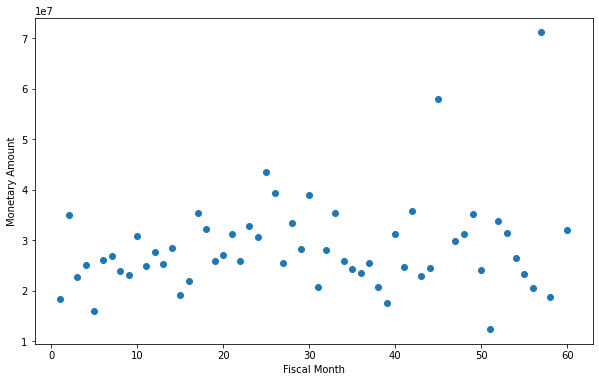

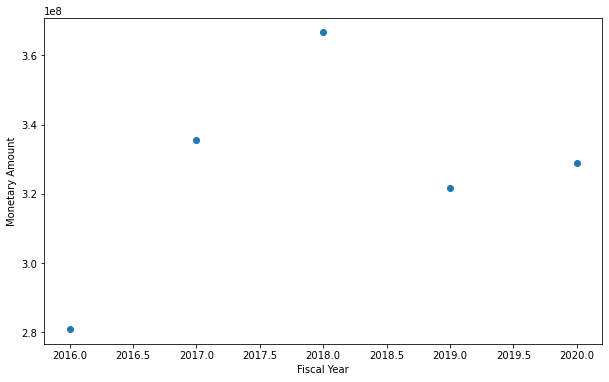

In [420]:
# compute monthly sum of monetary amount
df_BPSD = df[df['Department Name'] == 'Boston Public School Dept'][['Fiscal Month','Fiscal Year','Monetary Amount']]
df_BPSD = df_BPSD.reset_index(drop=True)
for x in range(2017,2021):
    df_BPSD.loc[df_BPSD['Fiscal Year'] == x, 'Fiscal Month'] += 12*(x-2016)
all_months = df_BPSD['Fiscal Month'].drop_duplicates()
all_months = all_months.reset_index(drop=True)
months_money = [df_BPSD[df_BPSD['Fiscal Month'] == month]['Monetary Amount'].sum() for month in all_months]
frame = {'Fiscal Month': all_months, 'Monetary Amount': months_money}
df_BPSD_monthly = pd.DataFrame(frame)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_BPSD_monthly['Fiscal Month'], df_BPSD_monthly['Monetary Amount'])
ax.set_xlabel('Fiscal Month')
ax.set_ylabel('Monetary Amount')
plt.show()

# compute yearly sum of monetary amount
all_years = pd.Series([2016,2017,2018,2019,2020])
years_money = [df_BPSD[df_BPSD['Fiscal Year'] == year]['Monetary Amount'].sum() for year in all_years]
frame2 = {'Fiscal Year': all_years, 'Monetary Amount': years_money}
df_BPSD_yearly = pd.DataFrame(frame2)
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.scatter(df_BPSD_yearly['Fiscal Year'], df_BPSD_yearly['Monetary Amount'])
ax2.set_xlabel('Fiscal Year')
ax2.set_ylabel('Monetary Amount')
plt.show()

In [421]:
#
# Based on two figures, I see a little up trend. The reason is probably that there are more and more students yearly
#

In [422]:
#
# Bonus part
#

In [423]:
# if one of FY18 and FY19 misses data, assume that is the same as that of the other year
# if both FY18 and FY19 miss data, set them None and drop it
df_rv = pd.read_csv('revenue-open-data_07.21.20_public.csv',encoding = "cp1252")
df_rv.head()
df_rv = df_rv.loc[:, 'Revenue Category':'FY19 Actual']
df_rv.loc[df_rv['FY18 Actual'] == ' -   ', 'FY18 Actual'] = df_rv.loc[df_rv['FY18 Actual'] == ' -   ', 'FY19 Actual']
df_rv.loc[df_rv['FY19 Actual'] == ' -   ', 'FY19 Actual'] = df_rv.loc[df_rv['FY19 Actual'] == ' -   ', 'FY18 Actual']
df_rv.loc[(df_rv['FY19 Actual'] == ' -   ') & (df_rv['FY18 Actual'] == ' -   '), ['FY18 Actual','FY19 Actual']] = None
df_rv['FY19 Actual'] = df_rv['FY19 Actual'].str.replace(',', '').str.replace('(', '-').str.replace(')', '').astype(float)
df_rv['FY18 Actual'] = df_rv['FY18 Actual'].str.replace(',', '').str.replace('(', '-').str.replace(')', '').astype(float)
df_rv = df_rv.dropna()

# departments in the expenditure data from 2018 to 2019
df_1819 = df[(df['Fiscal Year'] == 2018) | (df['Fiscal Year'] == 2019)]
dps_1819 = df_1819['Department Name']
dps_1819 = dps_1819.drop_duplicates()
dps_1819 = dps_1819.reset_index(drop=True)

# only analyze departments appearing in both expenditure data and revenue data
# mannualy added common departments in both dataset but named differently
dps_rv = df_rv['Department']
dps_rv = dps_rv.drop_duplicates()
dps_rv = dps_rv[dps_rv.isin(dps_1819)]
dps_rv = pd.concat([dps_rv, pd.Series(['Treas Dept - Treasury Division','Boston Public School Dept','Boston Center-Youth & Families','Inspectional Services Dept','Property Management','Dpt of Innovation & Technology','Labor Relations','Workers Compensation Fund','Ofc of Immigrant  Advancement','Public Facilities Dept','Veterans\' Services','Consumer Affairs & Licensing'])], ignore_index=True)
dps_rv = dps_rv.reset_index(drop=True)
dps_exp_sums = [df[df['Department Name'] == dp]['Monetary Amount'].sum() for dp in dps_rv]
dps_rv_sums = [df_rv[df_rv['Department'] == dp]['FY18 Actual'].sum() + df_rv[df_rv['Department'] == dp]['FY19 Actual'].sum() for dp in dps_rv]
ret = [rv - exp for rv, exp in zip(dps_rv_sums, dps_exp_sums)]

rets = pd.Series(ret)
frame3 = {'Departments': dps_rv, 'Returns': rets}
dps_ret = pd.DataFrame(frame3)
print(dps_ret)


                       Departments       Returns
0             Assessing Department  4.768892e+09
1        Transportation Department  7.658471e+07
2               Library Department -1.446129e+08
3                  Fire Department -1.325710e+08
4          Public Works Department -5.263107e+08
5                Registry Division  3.134620e+06
6                       City Clerk  8.425758e+05
7                Budget Management  1.132722e+07
8                 Health Insurance -1.522928e+09
9                Police Department -2.247586e+08
10        Neighborhood Development -3.417386e+08
11                  Law Department -9.305705e+06
12             Auditing Department  1.071699e+07
13        Office of Arts & Culture -5.863531e+06
14    Consumer Affairs & Licensing  1.268728e+07
15          Environment Department -2.231822e+07
16   Parks & Recreation Department -1.520617e+08
17   Youth Engagement & Employment -3.507319e+06
18             Election Department -4.296056e+06
19             Women

In [424]:
#
# question 1
#

In [425]:
dps_ret.iloc[dps_ret['Returns'].idxmax()]

Departments    Assessing Department
Returns                 4.76889e+09
Name: 0, dtype: object

In [426]:
print('Where has the city gotten the best return on its investment is', dps_ret['Departments'][dps_ret['Returns'].idxmax()])

Where has the city gotten the best return on its investment is Assessing Department


In [427]:
#
# question 2
#

In [428]:
dps_ret.iloc[dps_ret['Returns'].idxmin()]

Departments    Boston Public School Dept
Returns                     -1.65276e+09
Name: 24, dtype: object

In [429]:
print('Where has the city gotten the worest return on its investment is', dps_ret['Departments'][dps_ret['Returns'].idxmin()])

Where has the city gotten the worest return on its investment is Boston Public School Dept
